<a href="https://colab.research.google.com/github/lilreel/GDSC_USU/blob/main/2.%20Machine%20Learning/GDSC_USU_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression in Python (From Scratch)

dataset : https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?resource=download

source : https://towardsdatascience.com/simple-linear-regression-in-python-numpy-only-130a988c0212 and GDSC USU

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## dataset from my own github
url="https://raw.githubusercontent.com/lilreel/Datasets/main/Salary%20data%20-%20Simple%20linear%20regression/Salary_Data.csv"

df = pd.read_csv(url)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x = df['YearsExperience']
y = df['Salary']

## Calculating the Regression Line

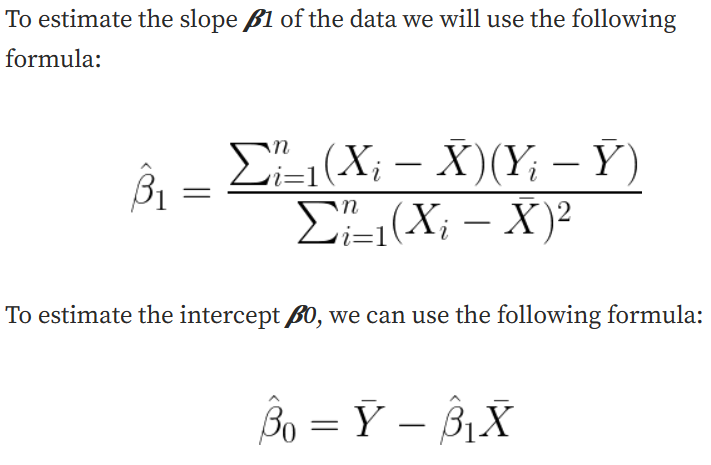

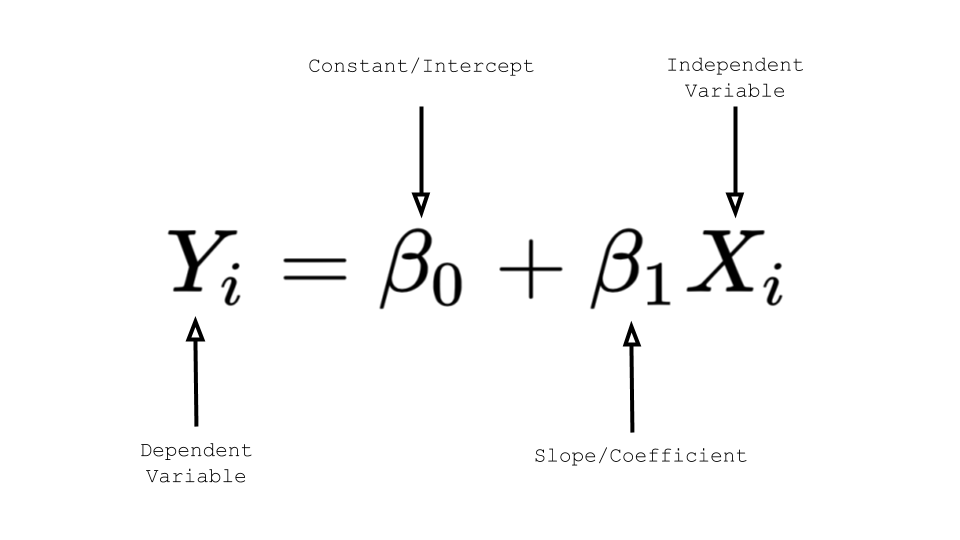

In [ ]:
#Menghitung B0, B1, dan Regression Line
def linear_regression(x, y):
  N = len(x)
  x_mean = x.mean()
  y_mean = y.mean()

  B1_num = ((x - x_mean) * (y - y_mean)).sum()
  B1_den = ((x - x_mean) ** 2).sum()
  B1 = B1_num/B1_den

  B0 = y_mean - (B1*x_mean)

  reg_line = 'y = {} + {}x'.format(B0, round(B1, 3))

  return (B0, B1, reg_line)

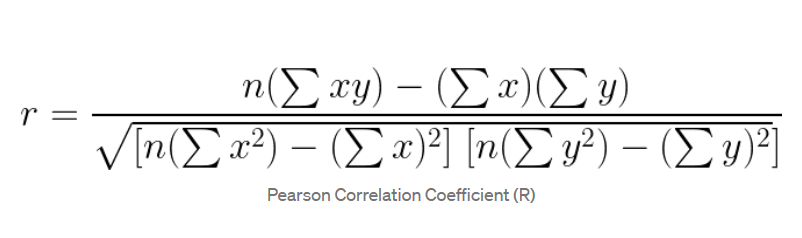

In [ ]:
#correlation coefficient
def corr_coef(x, y):
  N = len(x)

  num = (N * (x*y).sum()) - (x.sum() * y.sum())
  den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
  R = num / den
  return R

In [ ]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)

R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 25792.20019866869 + 9449.962x
Correlation Coef.:  0.97824161848876
"Goodness of Fit":  0.9569566641435087


##Plotting the Regression Line

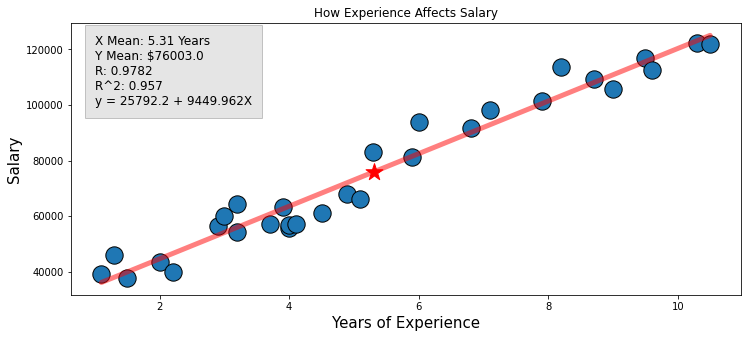

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2),
                          round(y.mean(), 2),
                          round(R, 4),
                          round(R**2, 4),
                          round(B0, 3),
                          round(B1, 3))

plt.text(x=1,
         y=100000,
         s=text,
         fontsize=12,
         bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Experience Affects Salary')
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

## Prediction

In [ ]:
def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y

In [ ]:
predict(B0, B1, 25)

262041.25823504562

# USING SKLEARN

In [ ]:
from sklearn.linear_model import LinearRegression

def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y

df = pd.read_csv(url)
x = df[['YearsExperience']]
y = df[['Salary']]
reg = LinearRegression()
reg.fit(x, y)
B1 = reg.coef_.item()
B0 = reg.intercept_.item()

In [ ]:
predict(B0, B1, 25)

262041.2582350456